# CNN with PyTorch 3

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models
from torchvision.utils import make_grid

import pandas as pd
import numpy as np
import os
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
from zipfile import ZipFile

zipped = ZipFile('./PYTORCH_NOTEBOOKS/Data/CATS_DOGS.zip')
zipped.extractall('./PYTORCH_NOTEBOOKS/Data/CATS_DOGS')

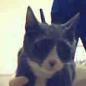

In [7]:
with Image.open('./PYTORCH_NOTEBOOKS/Data/CATS_DOGS/CATS_DOGS/test/CAT/10107.jpg') as im:
    display(im)

In [8]:
path = './PYTORCH_NOTEBOOKS/Data/CATS_DOGS/CATS_DOGS'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

In [9]:
len(img_names)

24994

In [10]:
img_sizes = []
rejected = []
for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)
    
    except:
        rejected.append(item)

In [11]:
print(len(img_sizes))
print(len(rejected))

24994
0


In [12]:
df = pd.DataFrame(img_sizes)

In [13]:
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [14]:
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

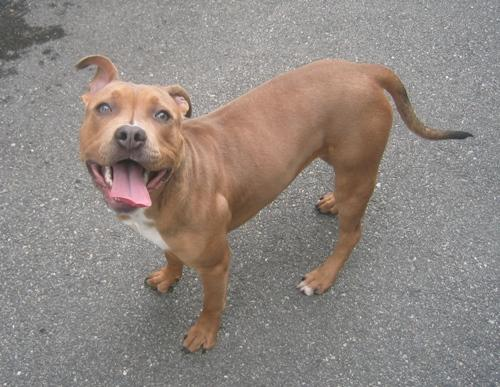

In [15]:
dog = Image.open('./PYTORCH_NOTEBOOKS/Data/CATS_DOGS/CATS_DOGS/train/DOG/14.jpg')
display(dog)

In [16]:
dog.size

(500, 387)

In [17]:
dog.getpixel((0,0))

(90, 95, 98)

In [20]:
transform = transforms.Compose(
    [
        transforms.ToTensor()
    ]
)
im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


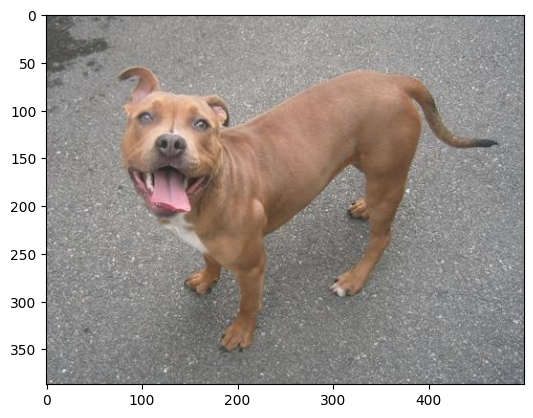

In [22]:
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

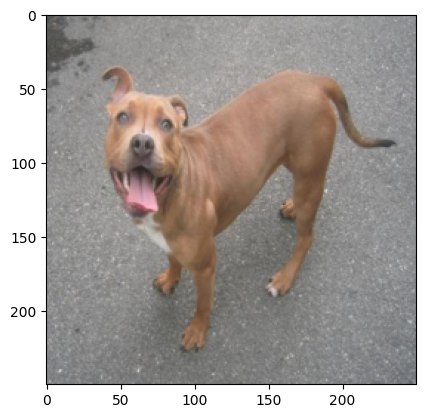

In [25]:
transform = transforms.Compose(
    [
        transforms.Resize((250, 250)),
        transforms.CenterCrop(250),
        transforms.ToTensor()
    ]
)
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

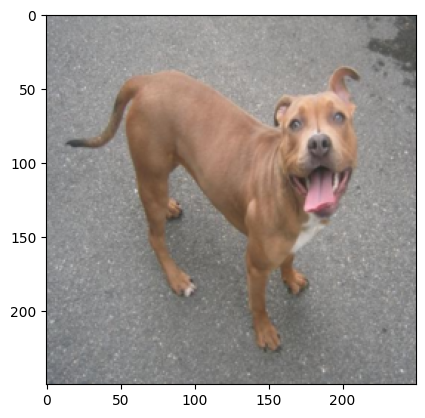

In [26]:
transform = transforms.Compose(
    [
        transforms.Resize((250, 250)),
        transforms.CenterCrop(250),
        transforms.RandomHorizontalFlip(p = 1),
        transforms.ToTensor()
    ]
)
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

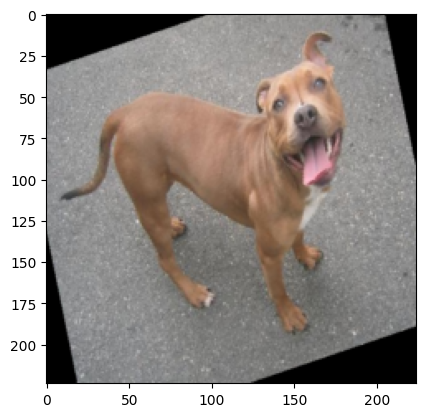

In [28]:
transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(p = 1),
        transforms.RandomRotation(30),
        transforms.Resize((224, 224)),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ]
)
im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


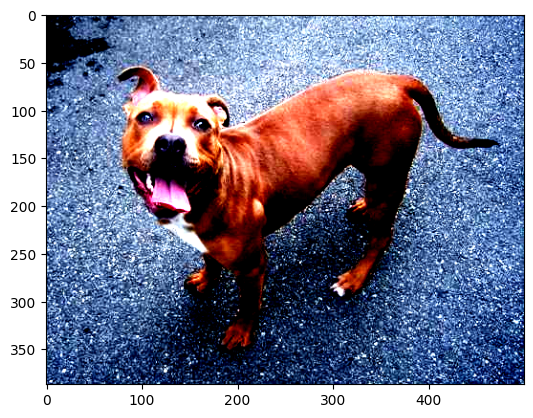

In [29]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
    ]
)

im = transform(dog)
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

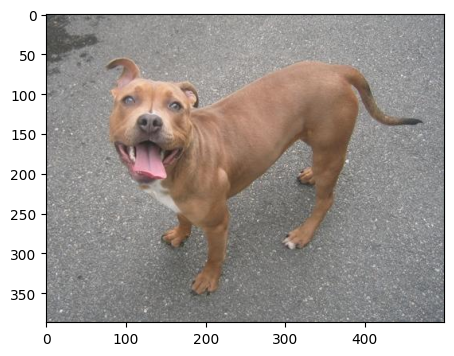

In [30]:
inv_normalize = transforms.Normalize(
    mean = [-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std = [1/0.229, 1/0.224, 1/0.225]
)

im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1,2,0)));

In [33]:
train_transform = transforms.Compose(
    [
        transforms.RandomRotation(10),
        transforms.RandomHorizontalFlip(),
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
    ]
)
test_transform = transforms.Compose(
    [
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
    ]
)

In [34]:
root = './PYTORCH_NOTEBOOKS/Data/CATS_DOGS/CATS_DOGS'

train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform = train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform = test_transform)
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

class_names = train_data.classes

In [35]:
class_names

['CAT', 'DOG']

In [36]:
len(train_data)

18743

In [37]:
len(test_data)

6251

In [38]:
for images, labels in train_loader:
    break

In [39]:
images.shape

torch.Size([10, 3, 224, 224])

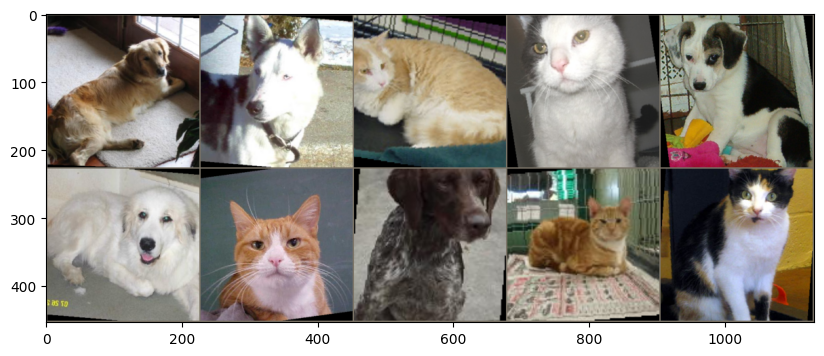

In [41]:
im = make_grid(images, nrow=5)
inv_normalize = transforms.Normalize(
    mean = [-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std = [1/0.229, 1/0.224, 1/0.225]
)

im_inv = inv_normalize(im)
plt.figure(figsize=(12, 4))
plt.imshow(np.transpose(im_inv.numpy(), (1,2,0)))

In [44]:
class ConvolutionNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(54*54*16, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,2)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim = 1)

In [45]:
torch.manual_seed(101)
CNNmodel = ConvolutionNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(CNNmodel.parameters(), lr = 1e-3)

In [46]:
CNNmodel.eval()

ConvolutionNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [47]:
for p in CNNmodel.parameters():
    print(p.numel())

162
6
864
16
5598720
120
10080
84
168
2


In [48]:
import time
start_time = time.time()

epochs = 3

# LIMITS on num of batches
max_trn_batch = 800 # batch 10 images --> 8000 images
max_tst_batch = 300 # batch 10 images --> 3000 images

train_losses = []
train_correct = []

test_losses = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        
        b+=1
        y_pred = CNNmodel(X_train)
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        trn_corr += (predicted==y_train).sum()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%200 == 0:
            print(f"Epoch: {i+1} Loss: {loss.item()}")

    train_losses.append(loss.item())
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break

            y_val = CNNmodel(X_test)
            predicted = torch.max(y_pred.data, 1)[1]
            tst_corr += (predicted==y_test).sum()

        loss = criterion(y_val, y_test)
        test_losses.append(loss.item())
        test_correct.append(tst_corr)

total_time = time.time()-start_time
print(f'Total Time: {total_time/60:.2f} minutes')

Epoch: 1 Loss: 0.5893208384513855
Epoch: 1 Loss: 0.513158917427063
Epoch: 1 Loss: 0.6792998313903809
Epoch: 1 Loss: 0.485445111989975
Epoch: 2 Loss: 0.5343090295791626
Epoch: 2 Loss: 0.5649709701538086
Epoch: 2 Loss: 0.5195199251174927
Epoch: 2 Loss: 0.7067714929580688
Epoch: 3 Loss: 0.5994328856468201
Epoch: 3 Loss: 0.5187917947769165
Epoch: 3 Loss: 0.7106642723083496
Epoch: 3 Loss: 0.618554949760437
Total Time: 8.57 minutes


In [ ]:
torch.save(CNNmodel.state_dict(), 'my3epochmodel.pt')

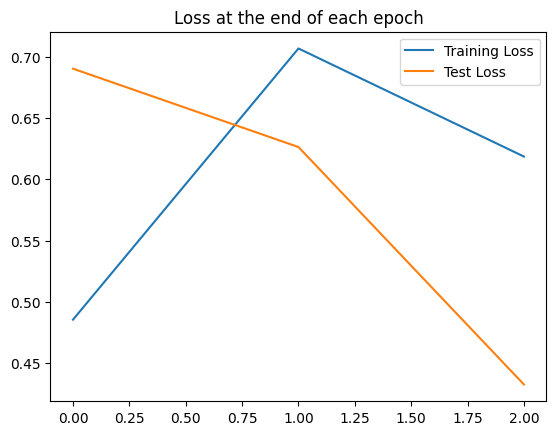

In [49]:
plt.plot(train_losses, label='Training Loss');
plt.plot(test_losses, label='Test Loss');
plt.title('Loss at the end of each epoch');
plt.legend();

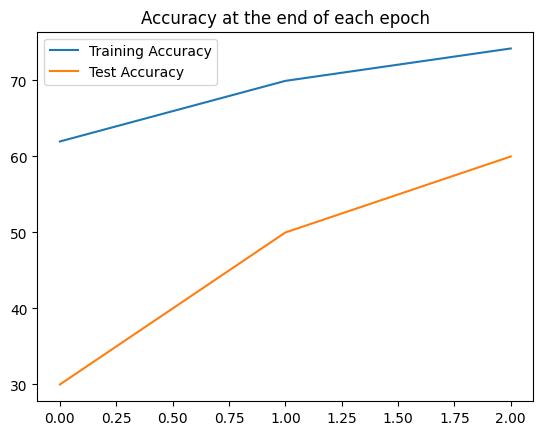

In [52]:
plt.plot([t/80 for t in train_correct], label = 'Training Accuracy');
plt.plot([t/30 for t in test_correct], label = 'Test Accuracy');
plt.title('Accuracy at the end of each epoch');
plt.legend();

In [54]:
AlexNetmodel = models.alexnet(pretrained = True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\Pratik Sanghavi/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100.0%


In [55]:
AlexNetmodel.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [62]:
for param in AlexNetmodel.parameters():
    param.requires_grad = False

In [64]:
torch.manual_seed(42)

AlexNetmodel.classifier = nn.Sequential(
    nn.Linear(9216,1024),
    nn.ReLU(inplace=True),
    nn.Dropout(0.5),
    nn.Linear(1024,2),
    nn.LogSoftmax(dim=1)
)

In [65]:
AlexNetmodel.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU(inplace=True)
    (2): Dro

In [66]:
for param in AlexNetmodel.parameters():
    print(param.numel())

23232
64
307200
192
663552
384
884736
256
589824
256
9437184
1024
2048
2


In [67]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNetmodel.classifier.parameters(), lr = 1e-3)

In [68]:
import time
start_time = time.time()

epochs = 1

# LIMITS on num of batches
max_trn_batch = 800 # batch 10 images --> 8000 images
max_tst_batch = 300 # batch 10 images --> 3000 images

train_losses = []
train_correct = []

test_losses = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        
        b+=1
        y_pred = AlexNetmodel(X_train)
        loss = criterion(y_pred, y_train)
        predicted = torch.max(y_pred.data, 1)[1]
        trn_corr += (predicted==y_train).sum()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if b%200 == 0:
            print(f"Epoch: {i+1} Loss: {loss.item()}")

    train_losses.append(loss.item())
    train_correct.append(trn_corr)

    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break

            y_val = AlexNetmodel(X_test)
            predicted = torch.max(y_pred.data, 1)[1]
            tst_corr += (predicted==y_test).sum()

        loss = criterion(y_val, y_test)
        test_losses.append(loss.item())
        test_correct.append(tst_corr)

total_time = time.time()-start_time
print(f'Total Time: {total_time/60:.2f} minutes')

Epoch: 1 Loss: 0.7980116605758667
Epoch: 1 Loss: 0.17895732820034027
Epoch: 1 Loss: 0.4461631178855896
Epoch: 1 Loss: 0.010157288052141666
Total Time: 3.77 minutes


In [ ]:
print(test_correct[1].item()/3000)

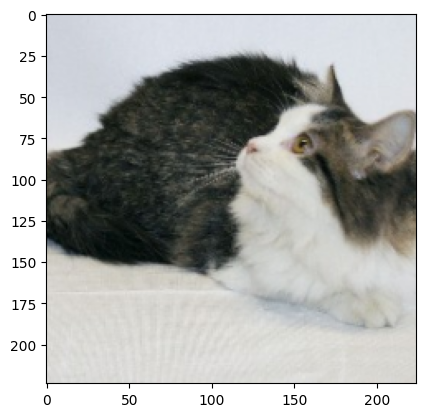

In [69]:
image_index = 2019

im = inv_normalize(test_data[image_index][0])
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [70]:
with torch.no_grad():
    new_pred = CNNmodel(test_data[image_index][0].view(1,3,224,224)).argmax()

class_names[new_pred.item()]

'CAT'

In [71]:
with torch.no_grad():
    new_pred = AlexNetmodel(test_data[image_index][0].view(1,3,224,224)).argmax()

class_names[new_pred.item()]

'CAT'